Dataset URL: https://drive.google.com/drive/folders/1HeTSIY5Xmd2vk2eAOlIjnSwlX45XciHv?usp=drive_link

Use the starter notebook and write code to help you: 
1. Specify an ML model that can understand both images and text into Weaviate
2. Add the provided data to your vector database - feel free to use your own images for this aswell!
3. Search the data with a text query
4. Search the data with an image query.

In [1]:
import pickle, weaviate, json, os, IPython

### We first need to start a local instance of Weaviate using Docker.

1. This can be done by opening up a terminal in the folder with the provided `docker-compose.yml` file in it and typing:
```bash
docker compose up
```

2. Later, in order to bring Weaviate down you can just go into this terminal window and type `Ctrl + C`

In [2]:
#Connect to locally hosted Weaviate and check if everything is ready

client = weaviate.Client("http://localhost:8080")

print(f"Client created? {client.is_ready()}")

Client created? True


### Q1: Specify an ML model that can understand both images and text into Weaviate

In [3]:
#To do this we need to specify a schema in which we can specify the model to be used
# aswell as the properties. 

class_obj = {
    "class": "TextImageSearch",
        "moduleConfig": {
        "multi2vec-clip": {"imageFields": ["image"]}
        },
        "vectorizer": "multi2vec-clip",
        "properties": [
            {"name": "text", "dataType": ["string"]},
            {"name": "image", "dataType": ["blob"]}
        ]
    }

client.schema.create_class(class_obj)
print("Schema class created")

Schema class created


### Q2: Add the provided data to your vector database - feel free to use your own images for this aswell!

In [5]:
# Here we will pass in a larger dataset into a folder called "Images"

#If you'd like to add your own images to the vector database to search over
# feel free to add them into this folder aswell!

for img in os.listdir("Images/"):
    
    # ADD CODE HERE
    print(f"Adding Images: {img}")
    
    encoded_image = weaviate.util.image_encoder_b64(f"Images/{img}")
    
    data_properties = {
        "image": encoded_image,
        "text": img
    }
    client.data_object.create(data_properties, "TextImageSearch")
    
print("Images added")

Adding Images: ILSVRC2012_val_00032482.JPEG
Adding Images: n02979186_491.JPEG
Adding Images: n03000684_400.JPEG
Adding Images: n03000684_1040.JPEG
Adding Images: ILSVRC2012_val_00010770.JPEG
Adding Images: n01440764_910.JPEG
Adding Images: ILSVRC2012_val_00023440.JPEG
Adding Images: ILSVRC2012_val_00025890.JPEG
Adding Images: n02979186_1792.JPEG
Adding Images: ILSVRC2012_val_00033682.JPEG
Adding Images: n03000684_441.JPEG
Adding Images: n03000684_292.JPEG
Adding Images: n03394916_5011.JPEG
Adding Images: n02102040_430.JPEG
Adding Images: n03425413_430.JPEG
Adding Images: n02102040_332.JPEG
Adding Images: n03417042_30.JPEG
Adding Images: n03394916_7000.JPEG
Adding Images: n01440764_1561.JPEG
Adding Images: n03417042_1051.JPEG
Adding Images: n03394916_1091.JPEG
Adding Images: n03000684_590.JPEG
Adding Images: ILSVRC2012_val_00019711.JPEG
Adding Images: n03000684_882.JPEG
Adding Images: ILSVRC2012_val_00032800.JPEG
Adding Images: n01440764_341.JPEG
Adding Images: ILSVRC2012_val_00027182.J

Adding Images: n03888257_1430.JPEG
Adding Images: n03028079_1.JPEG
Adding Images: n03425413_1610.JPEG
Adding Images: n03425413_212.JPEG
Adding Images: ILSVRC2012_val_00043731.JPEG
Adding Images: n03417042_130.JPEG
Adding Images: n01440764_522.JPEG
Adding Images: n01440764_172.JPEG
Adding Images: n03445777_340.JPEG
Adding Images: n02979186_1061.JPEG
Adding Images: n01440764_1302.JPEG
Adding Images: n03445777_602.JPEG
Adding Images: n02102040_290.JPEG
Adding Images: n01440764_261.JPEG
Adding Images: n02102040_341.JPEG
Adding Images: n03000684_672.JPEG
Adding Images: n03417042_1022.JPEG
Adding Images: ILSVRC2012_val_00014280.JPEG
Adding Images: n03888257_1171.JPEG
Adding Images: ILSVRC2012_val_00043121.JPEG
Adding Images: n02979186_1630.JPEG
Adding Images: n03425413_1351.JPEG
Adding Images: ILSVRC2012_val_00011581.JPEG
Adding Images: n01440764_762.JPEG
Adding Images: n03445777_531.JPEG
Adding Images: ILSVRC2012_val_00009191.JPEG
Adding Images: ILSVRC2012_val_00036282.JPEG
Adding Images: n

In [ ]:
weaviate.util.image_decoder_b64

### Q3. Search the data with a text query

In [6]:
res = (client.query
       .get("TextImageSearch", ["text", "_additional {distance} "])
       .with_near_text({"concepts": ["beautiful architecture"]})
       .with_limit(3)
       .do()
      )

print(json.dumps(res,indent=2))

{
  "data": {
    "Get": {
      "TextImageSearch": [
        {
          "_additional": {
            "distance": 0.7282325
          },
          "text": "n03028079_322.JPEG"
        },
        {
          "_additional": {
            "distance": 0.73167
          },
          "text": "n03028079_732.JPEG"
        },
        {
          "_additional": {
            "distance": 0.7335175
          },
          "text": "n03028079_102.JPEG"
        }
      ]
    }
  }
}


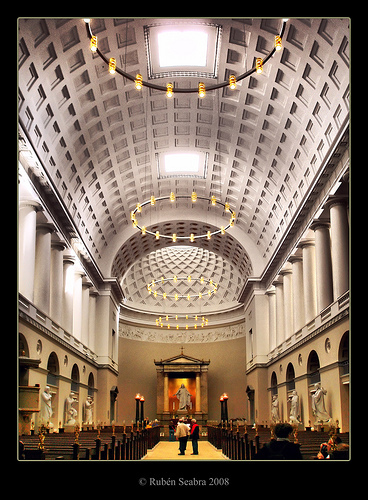

In [8]:
IPython.display.Image(filename='Images/n03028079_322.JPEG', width=300) 

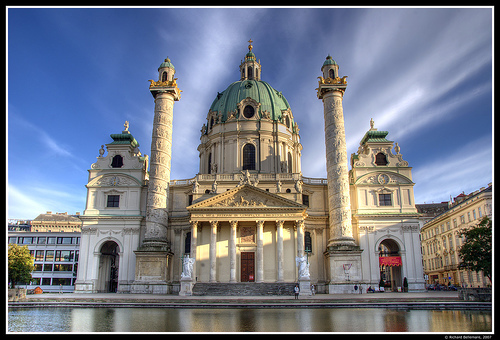

In [9]:
IPython.display.Image(filename='Images/n03028079_732.JPEG', width=300) 

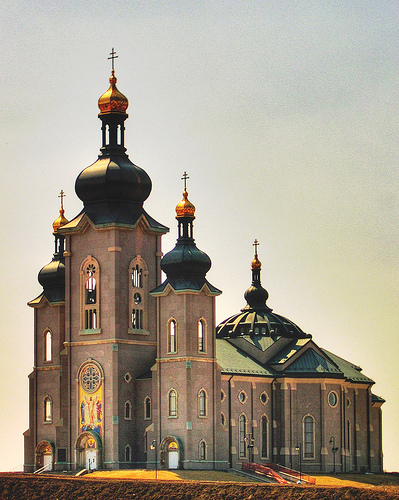

In [10]:
IPython.display.Image(filename='Images/n03028079_102.JPEG', width=300) 

### Feel free to perform more searches and see if you can explain why specific text search queries return images! 

#### You've sucessfully used a vector database to build text-to-image search!

### Q4. Search the data with an image query.

- **Here we will pass in images that are not in the vector database and search for the most similar images as determined by vector search** 

- **These images can be found in the `TestImages` folder. Feel free to provide your own images as search queries here aswell!**

#### First visualize the image you want to query the database with:

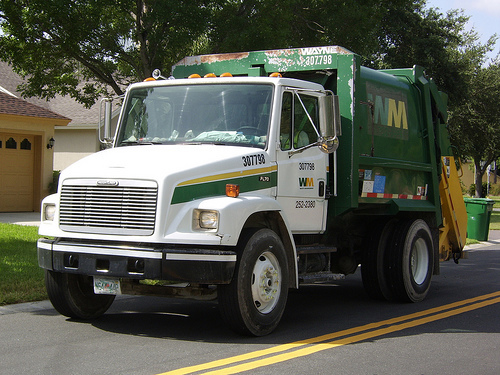

In [12]:
IPython.display.Image(filename='TestImages/n03417042_28762.JPEG', width=300) 

#### Now let's write a query to search using this image:

In [14]:
imres = (client.query
         .get("TextImageSearch", ["text", "_additional {certainty} "])
         .with_near_image({'image':'TestImages/n03417042_28762.JPEG'})
         .with_limit(3)
         .do())

print(json.dumps(imres,indent=2))

{
  "data": {
    "Get": {
      "TextImageSearch": [
        {
          "_additional": {
            "certainty": 0.9543887972831726
          },
          "text": "ILSVRC2012_val_00033842.JPEG"
        },
        {
          "_additional": {
            "certainty": 0.929283082485199
          },
          "text": "ILSVRC2012_val_00022172.JPEG"
        },
        {
          "_additional": {
            "certainty": 0.9279281497001648
          },
          "text": "n03417042_212.JPEG"
        }
      ]
    }
  }
}


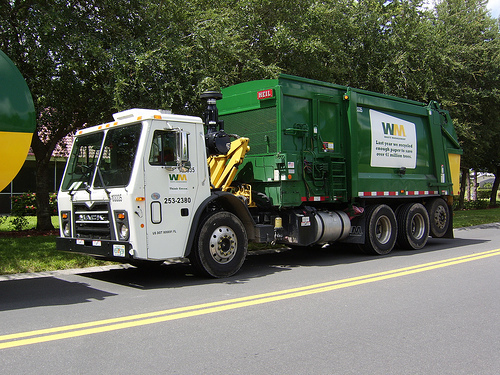

In [15]:
IPython.display.Image(filename='Images/ILSVRC2012_val_00033842.JPEG', width=300) 

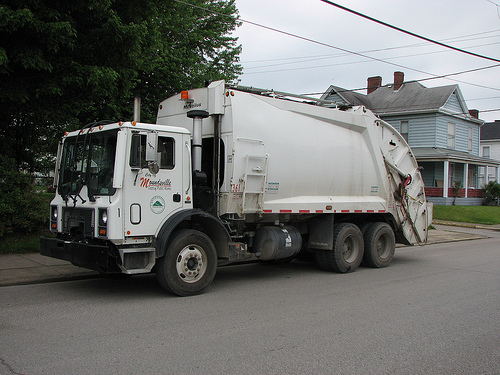

In [17]:
IPython.display.Image(filename='Images/ILSVRC2012_val_00022172.JPEG', width=300) 

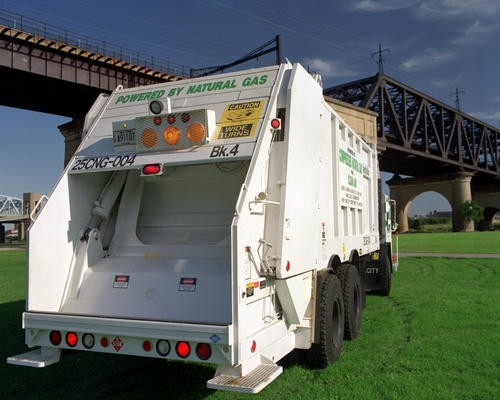

In [18]:
IPython.display.Image(filename='Images/n03417042_212.JPEG', width=300) 